<a href="https://colab.research.google.com/github/adityakhandeliajiit/F5-TTS/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Sales Predictor__

Raw Data

In [4]:
import pandas as pd
import numpy as np

In [5]:
df_stores = pd.read_csv("stores.csv")
df_oil = pd.read_csv("oil.csv")
df_txn = pd.read_csv("transactions.csv")
df_train = pd.read_csv("train.csv")
df_holidays = pd.read_csv("holidays_events.csv")


Dropping Transfered holidays

In [6]:
df_holidays = df_holidays[df_holidays["transferred"] != True]

In [7]:
df_holidays["transferred"].value_counts()

,count
transferred,
False,338


In [8]:
df_holidays.drop("transferred",axis=1,inplace=True)

In [9]:
df_holidays.head()

,date,type,locale,locale_name,description
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba


Dropping Description

In [10]:
df_holidays.drop("description",axis=1,inplace=True)
df_holidays.head()

,date,type,locale,locale_name
0,2012-03-02,Holiday,Local,Manta
1,2012-04-01,Holiday,Regional,Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca
3,2012-04-14,Holiday,Local,Libertad
4,2012-04-21,Holiday,Local,Riobamba


In [11]:
df_txn.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [12]:
df_oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


Adding All dates in range and interpolating in oil data


In [13]:

df_oil.head()


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [14]:
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_oil.set_index('date',inplace=True)
df_oil = df_oil.reindex(pd.date_range(start=df_oil.index.min(), end=df_oil.index.max(), freq='D'))
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].interpolate()

In [15]:
df_oil.head()

,dcoilwtico
2013-01-01,NaN
2013-01-02,93.140000
2013-01-03,92.970000
2013-01-04,93.120000
2013-01-05,93.146667


In [16]:
df_oil.isnull().sum()


,0
dcoilwtico,1


In [17]:
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].interpolate(limit_direction='both')


In [18]:
df_oil.isnull().sum()

,0
dcoilwtico,0


In [19]:
df_oil.head()

,dcoilwtico
2013-01-01,93.140000
2013-01-02,93.140000
2013-01-03,92.970000
2013-01-04,93.120000
2013-01-05,93.146667


In [20]:
import matplotlib.pyplot as plt


In [21]:
a=df_oil.index
a

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
               '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', length=1704, freq='D')

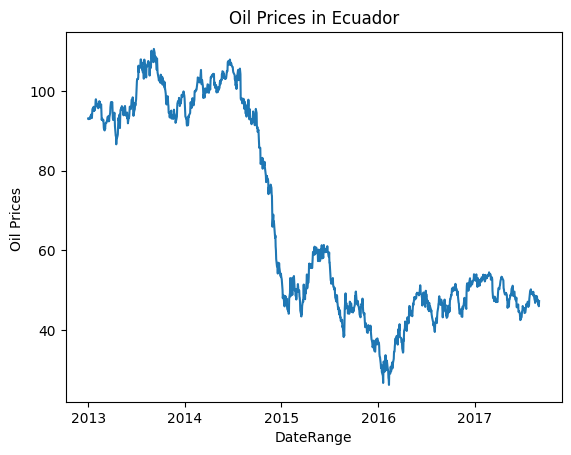

In [22]:
plt.xlabel("DateRange")
plt.ylabel("Oil Prices ")
plt.title("Oil Prices in Ecuador")
plt.plot(a,df_oil.dcoilwtico)

In [23]:
df_oil_raw = pd.read_csv("oil.csv")
df_oil_raw.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


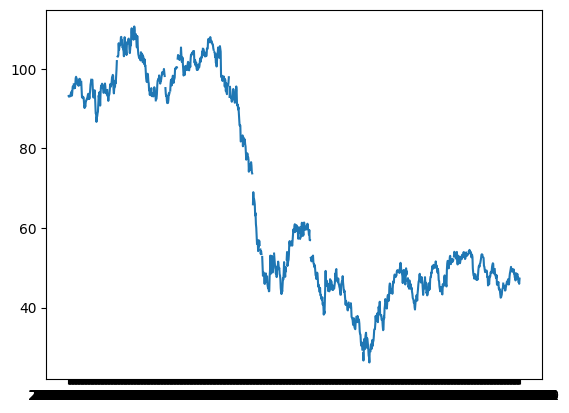

In [24]:
plt.plot(df_oil_raw.date,df_oil_raw.dcoilwtico)

In [25]:
df_oil

,dcoilwtico
2013-01-01,93.140000
2013-01-02,93.140000
2013-01-03,92.970000
2013-01-04,93.120000
2013-01-05,93.146667
...,...
2017-08-27,46.816667
2017-08-28,46.400000
2017-08-29,46.460000
2017-08-30,45.960000


In [26]:
df_oil=df_oil.reset_index()
df_oil

,index,dcoilwtico
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667
...,...,...
1699,2017-08-27,46.816667
1700,2017-08-28,46.400000
1701,2017-08-29,46.460000
1702,2017-08-30,45.960000


In [27]:
df_oil

,index,dcoilwtico
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667
...,...,...
1699,2017-08-27,46.816667
1700,2017-08-28,46.400000
1701,2017-08-29,46.460000
1702,2017-08-30,45.960000


In [28]:
# df_oil.drop('level_0',axis=1)

In [29]:
df_oil.columns=['date','dcoilwtico']
df_oil.head()

,date,dcoilwtico
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667


In [30]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667


In [31]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0


In [32]:
df_train.dtypes

,0
id,int64
date,object
store_nbr,float64
family,object
sales,float64
onpromotion,float64


In [36]:
# df_oil['date'] = pd.to_datetime(df_oil['date'])
# df_train['date'] = pd.to_datetime(df_train['date'])
valid_dates = pd.to_datetime(df_train['date'], errors='coerce')
df_train = df_train[valid_dates.notna()].copy()
df_train['date'] = valid_dates[valid_dates.notna()]


In [37]:
df_train_new= pd.merge(df_train,df_oil,on='date')
df_train_new.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,93.14
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0,93.14
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0,93.14
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0,93.14
4,4,2013-01-01,1.0,BOOKS,0.0,0.0,93.14


In [38]:
df_txn.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [39]:
df_txn.dtypes

,0
date,object
store_nbr,int64
transactions,int64


In [40]:
df_train_new.dtypes

,0
id,int64
date,datetime64[ns]
store_nbr,float64
family,object
sales,float64
onpromotion,float64
dcoilwtico,float64


In [41]:

df_txn['date'] = pd.to_datetime(df_txn['date'])
df_train_new=pd.merge(df_train_new,df_txn,on=['store_nbr','date'])


In [42]:
df_train_new.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions
0,561,2013-01-01,25.0,AUTOMOTIVE,0.0,0.0,93.14,770
1,562,2013-01-01,25.0,BABY CARE,0.0,0.0,93.14,770
2,563,2013-01-01,25.0,BEAUTY,2.0,0.0,93.14,770
3,564,2013-01-01,25.0,BEVERAGES,810.0,0.0,93.14,770
4,565,2013-01-01,25.0,BOOKS,0.0,0.0,93.14,770


In [43]:
df_holidays

,date,type,locale,locale_name
0,2012-03-02,Holiday,Local,Manta
1,2012-04-01,Holiday,Regional,Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca
3,2012-04-14,Holiday,Local,Libertad
4,2012-04-21,Holiday,Local,Riobamba
...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador
346,2017-12-23,Additional,National,Ecuador
347,2017-12-24,Additional,National,Ecuador
348,2017-12-25,Holiday,National,Ecuador


In [44]:
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [45]:
df_test = pd.read_csv("test.csv")
df_test.tail()

,id,date,store_nbr,family,onpromotion
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


In [46]:
df_train_new

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,transactions
0,561,2013-01-01,25.0,AUTOMOTIVE,0.000,0.0,93.14,770
1,562,2013-01-01,25.0,BABY CARE,0.000,0.0,93.14,770
2,563,2013-01-01,25.0,BEAUTY,2.000,0.0,93.14,770
3,564,2013-01-01,25.0,BEVERAGES,810.000,0.0,93.14,770
4,565,2013-01-01,25.0,BOOKS,0.000,0.0,93.14,770
...,...,...,...,...,...,...,...,...
980161,1136053,2014-10-01,34.0,POULTRY,196.656,0.0,90.74,2555
980162,1136054,2014-10-01,34.0,PREPARED FOODS,57.000,0.0,90.74,2555
980163,1136055,2014-10-01,34.0,PRODUCE,806.767,0.0,90.74,2555
980164,1136056,2014-10-01,34.0,SCHOOL AND OFFICE SUPPLIES,4.000,0.0,90.74,2555


In [47]:
pip install statsmodels

In [48]:
from statsmodels.tsa.arima.model import ARIMA


In [49]:
df_train_new.set_index('date', inplace=True)

In [50]:
df_train_new.head()

,id,store_nbr,family,sales,onpromotion,dcoilwtico,transactions
date,,,,,,,
2013-01-01,561,25.0,AUTOMOTIVE,0.0,0.0,93.14,770
2013-01-01,562,25.0,BABY CARE,0.0,0.0,93.14,770
2013-01-01,563,25.0,BEAUTY,2.0,0.0,93.14,770
2013-01-01,564,25.0,BEVERAGES,810.0,0.0,93.14,770
2013-01-01,565,25.0,BOOKS,0.0,0.0,93.14,770


In [53]:
model = ARIMA(df_train_new['sales'], order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


980166    352.903235
980167    336.509083
980168    337.279406
980169    337.243210
980170    337.244911
980171    337.244831
980172    337.244835
980173    337.244835
980174    337.244835
980175    337.244835
Name: predicted_mean, dtype: float64


<Axes: xlabel='date'>

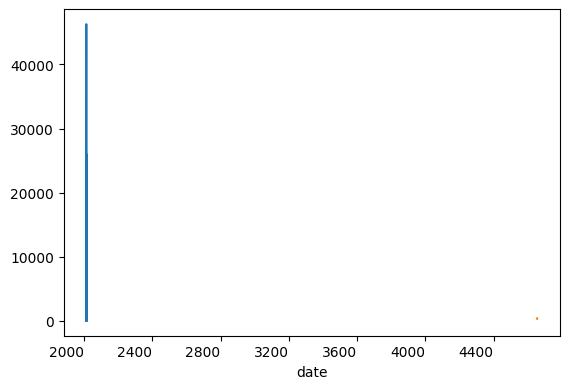

In [58]:
# Forecast
import matplotlib.pyplot as plt
forecast = model_fit.forecast(steps=10)  # Forecast next 10 periods
print(forecast)

# Plot
df_train_new['sales'].plot(label='Actual')


<Axes: >

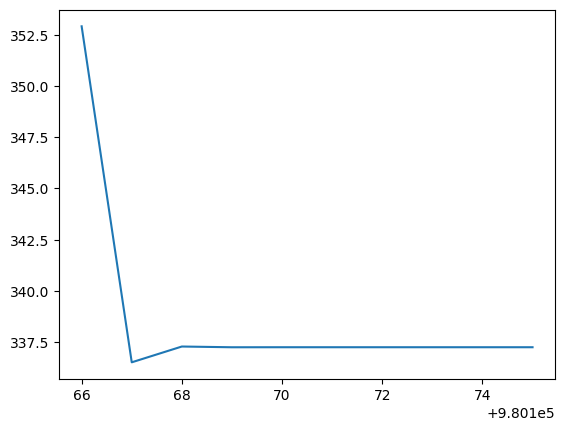

In [59]:
forecast.plot(label='forecast')

__EXIT__